# Выявление закономерностей определяющих успешность игры

## Изучение общей информации

### Подключение библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Открытие файла и его первичный анализ

In [2]:
df = pd.read_csv('/datasets/games.csv') 
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<b>Предварительные выводы:</b><br>
 - данные имеют пропуски;
 - в некоторых столбцах использован неверный тип;
 - наименование столбцов необходимо скорректировать (привести к нижнему регистру)

## Подготовка данных

### Замена названия столбцов (приведение к нижнему регистру)

In [3]:
df.columns = map(str.lower, df.columns)
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование данных в нужные типы

В столбцах <i>year_of_release, user_score</i> данные не соответствуют типу, т.к. год не может быть дробным числом, а рейтинг является числовым значением (не объектным)

In [4]:
#print(df['year_of_release'].value_counts(dropna= False)) # - предварительная оценка содержащейся в столбце информации
df['year_of_release']=df['year_of_release'].astype('Int64')

In [5]:
df['user_score'].value_counts(dropna= False)

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.1       2
9.6       2
1.9       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

~ На данном этапе приведение типа данных к вещественному не представляется возможным, т.к. в столбце с оценкой пользователей есть текстовое значение "tbd"

### Обработка пропусков

<b>Провески обнаружены в следущих столбцах:</b><br>
<i>
 - name (2);
 - year_of_release (269);
 - genre (2);
 - critic_score (8578);
 - user_score (6701);
 - rating(6766)

#### Пропуски в столбцах "name" и "genre"

In [6]:
#вывод на экран пропусков в столбце имя
df.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<b> Данные строки содержат мало полезной информации и их количество ничтожно мало. Полагаю, что их стоит удалить из выборки, тем самым уходят по 2 пропуска в столбцах <i> name, genre, critic_score, user_score, rating

In [7]:
df.dropna(subset = ['name'], inplace = True)
#df.info() # проверка удаления

#### Пропуски в столбце "year_of_release"

In [8]:
df['year_of_release'].value_counts(dropna= False)

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
NaN      269
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

<b> Т.к. в столбце "year_of_release" количество пропусков достаточно мало, чтобы не влиять значительно на общую выборку, то пока не вижу необходимости обрабатывать все пропущенные значения и заполним их "-1".

In [9]:
#вывод на экран пропусков в столбце year_of_release
df.query('year_of_release.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
df['year_of_release'] = df['year_of_release'].fillna(-1)
df.query('year_of_release==-1')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,-1,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,-1,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,-1,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,-1,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,-1,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,-1,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,-1,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,-1,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,-1,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Обработка значения "tbd" в столбце <i>"user_score"

<b>tbd расшифровывается как - To Be Determined, то есть "Будет определено"</b><br>
Т.к. мы не можем знать фактическое значение, мы их заполним "-1".

In [11]:
df['user_score'] = df['user_score'].replace('tbd', -1)
df['user_score'] = pd.to_numeric(df['user_score'])

#### Пропуски в столбцах <i>"critic_score", "user_score" и "rating"

In [12]:
#вывод на экран пропусков в столбце critic_score
df.query('critic_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
#вывод на экран пропусков в столбце user_score
df.query('user_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
#вывод на экран пропусков в столбце rating
df.query('rating.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<b> Т.к. в столбцах "critic_score", "user_score" и "rating" большое количество пропусков.<br>
Бросается в глаза отсутствие всех искомых данных в значительном количестве строк, что приводит к мысли о том, что значения были не заполнены сознательно или отсутсвовала информация. <br>
Т.к. мы не можем субективно оценить на значения этих параметров, мы их заполним "-1".

In [15]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df['rating'] = df['rating'].fillna(-1)

### Посчет суммарных продаж во всех регионах

In [16]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


<b>Промежуточные результаты:</b>
 - наименование столбцов приведены к нижнему регистру;
 - пропуски в name и genre удалены;
 - типы данных приведены в соответствие с содержанием;
 - обработаны пропуски в столбцах сritic_score, user_score и rating. Заполнение этих пропусков синтетическими данными привело бы к искажению результатов исследования, поэтому принято решение заменить их на -1 (что будет учитываться в дальнейшем исследовании);
 - в user_score заменено значения tbd на -1;
 - рассчитаны суммарные продажи во всех регионах (столбец total_sales)

## Исследовательский анализ данных

### Выпуск игр в разные годы

In [17]:
y_rel = df.query('year_of_release >= 0').groupby('year_of_release')['name'].count().reset_index()
y_rel.columns = ['year', 'quantity']
y_rel

,year,quantity
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


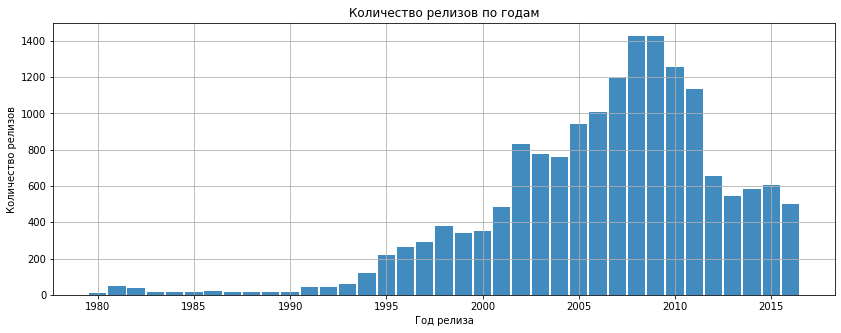

In [18]:
plt.figure(figsize=(14, 5))
plt.bar(y_rel['year'], y_rel['quantity'], alpha=0.85, width=0.9)
plt.title('Количество релизов по годам')
plt.xlabel('Год релиза')
plt.ylabel('Количество релизов')
plt.grid()

plt.show();

<b>Вывод:

Исходя из графика можно сделать вывод о том, что для анализа предположительно достаточно выборки данных начиная с 2000 года.
    

Также можно проследить значительный рост с 1994 по 2008 гг., который сменился значительным (в 2 раза) падением.
    
За последние 5 лет (2012-2016) количество ежегодных релизов находится в относильно постоянном диапазоне.

### Изменение продаж по платформам

In [19]:
df.query('year_of_release > 1999').pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='')

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
3DS,,,,,,,,,,,,116.0,93.0,91.0,80.0,86.0,46.0
DC,20.0,8.0,1.0,,,,,1.0,1.0,,,,,,,,
DS,,,,,23.0,118.0,201.0,376.0,492.0,403.0,323.0,153.0,23.0,8.0,,,
GB,17.0,10.0,,,,,,,,,,,,,,,
GBA,1.0,107.0,198.0,150.0,175.0,135.0,39.0,6.0,,,,,,,,,
GC,,22.0,152.0,144.0,83.0,97.0,40.0,4.0,,,,,,,,,
N64,60.0,9.0,1.0,,,,,,,,,,,,,,
PC,7.0,15.0,19.0,33.0,30.0,37.0,52.0,62.0,76.0,107.0,90.0,139.0,61.0,38.0,47.0,50.0,54.0
PS,160.0,91.0,20.0,3.0,,,,,,,,,,,,,


<b> Из полученной таблицы можно увидеть, что к 2016 году основная часть платформ прекратила выпуск новых релизов (морально устарела или обновилась)

In [20]:
#получение 10 наиболее востребованных платформ
pl_s = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(10)
pl_s.head(10)

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [21]:
pop_pl = pl_s['platform'].values
pop_pl

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'],
      dtype=object)

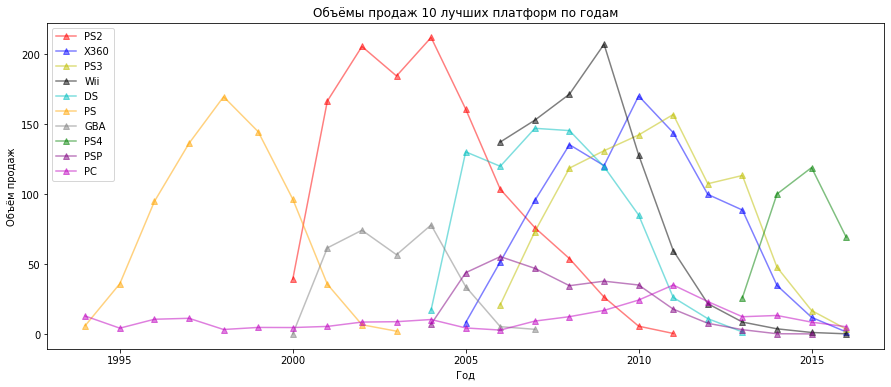

In [22]:
color = ['r','b','y','black','c','orange','grey','green','purple','m']

plt.figure(figsize=(15, 6))

plt.title('Объёмы продаж 10 лучших платформ по годам')

m_y = 0
for i in range(0,len(pop_pl)):
    platform  = df.query('year_of_release >= 1994').query('platform == @pop_pl[@i]').groupby('year_of_release')['total_sales'].sum()
    m_y += platform.count()
    platform.plot(x=platform.index, y=platform.values, style='-^', color=color[i], \
                  label=pop_pl[i], alpha=0.5, grid=True);
plt.xlabel('Год')
plt.ylabel('Объём продаж')
plt.grid()
plt.legend()
plt.show()

In [23]:
#расчет среднего времени жизни платформы
m_y/len(pop_pl)

11.3

<b>По распределению можно сделать следующие выводы:</b>
 - средний жизненный цикл платформы 11 лет (исулючение cоcтавляют игры на PC);
 - новые платформы появляются на смену старым (линейка PS)
 - наиболее популярной платформой за всё время можно уверенно назвать Play Station (PS)

### Определение актуального периода

<b>Исходя из предварительного анализа, делаем вывод, что актуальная информация для прогноза лежит в диапазоне после 2011 года, т.к. в этом году основная масса актуальных платформ показывает наиболее корректные показатели сегодняшнего рынка

In [24]:
df_n=df.query('year_of_release >= 2012')

### Определение лидирующих платформ

In [25]:
pl = df_n.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(5)
pl.head()

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32


In [26]:
pop1_pl = pl['platform'].values
pop1_pl

array(['PS4', 'PS3', 'X360', '3DS', 'XOne'], dtype=object)

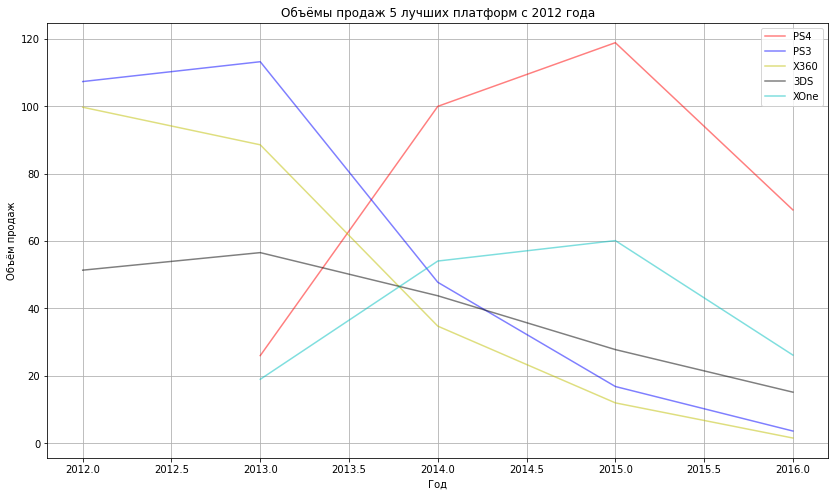

In [27]:
color = ['r','b','y','black','c']

plt.figure(figsize=(14, 8))
plt.grid()
plt.title('Объёмы продаж 5 лучших платформ с 2012 года')

m_y = 0
for i in range(0,len(pop1_pl)):
    platform  = df_n.query('platform == @pop1_pl[@i]').groupby('year_of_release')['total_sales'].sum()
    m_y += platform.count()
    platform.plot(x=platform.index, y=platform.values, style='-', color=color[i], \
                  label=pop1_pl[i], alpha=0.5, grid=True);
plt.xlabel('Год')
plt.ylabel('Объём продаж')
plt.legend()
plt.show()

<b>Вывод:
 - за выбранный период с 2012 года видно, что лидирующими платформами можно смело назвать PS4 и XOne;
 - у остальных платформ наблюдается спад, поэтому развитие этих направлений должно быть более умеренное.

### Анализ глобальных продаж игр в разбивке по платформам

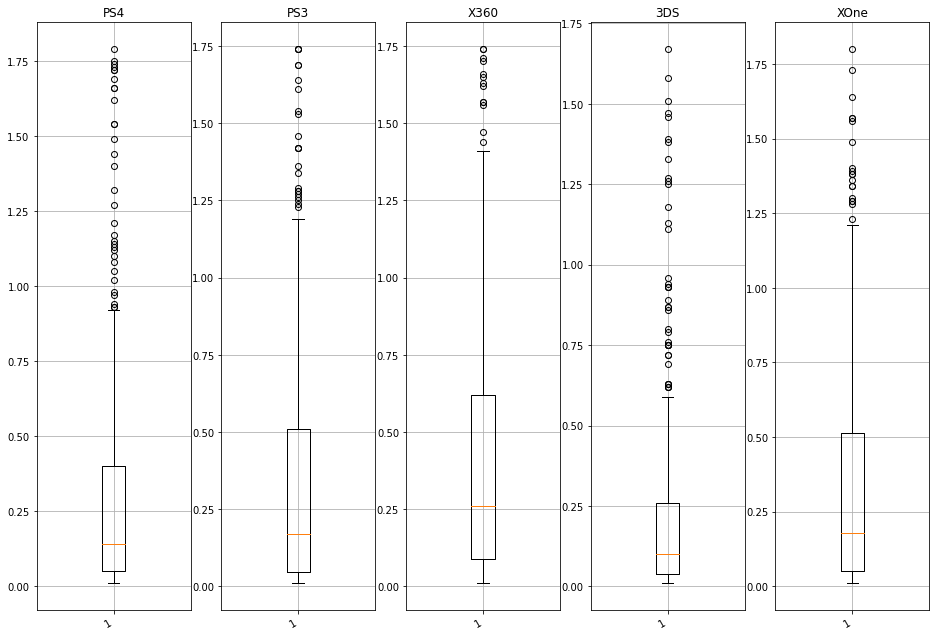

In [28]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(16, 12))
fig.autofmt_xdate();

p = {ax1:'PS4', ax2:'PS3', ax3:'X360', ax4:'3DS', ax5:'XOne'}
for ax in [ax1, ax2, ax3, ax4, ax5]:
    sales = df_n.query('platform==@p[@ax] and total_sales<1.8')['total_sales']
    ax.boxplot(sales)
    ax.grid()
    ax.set_title(p[ax])

fig.autofmt_xdate()

<b>Вывод:</b>

По диаграммам размаха можно заметить, что медианные значения продаж у X360 находятся близко к уровню 0,25, а в остальных к уровню 0,15.

На платформе PS4 большая часть проданых игр лежит до значения в 0,9, на платформe 3DS около 0,6, на  XONE и PS3 по 1,2, а в лидерах X360(1.4)

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

<b> В качестве исследуемой популярной платформы возьмём PS4

In [29]:
#выделим в отдельную таблицу продажи по PS4
st_ps = df_n.query('platform == "PS4" and user_score != -1 and critic_score != -1')

Text(0.5, 0, 'Оценка пользователей')

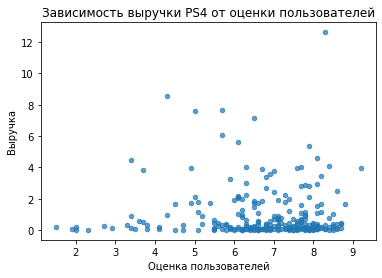

In [30]:
#график
st_ps.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.7, title='Зависимость выручки PS4 от оценки пользователей')
ax = plt.gca()
ax.set_ylabel('Выручка')
ax.set_xlabel('Оценка пользователей')

In [31]:
#корреляция продаж к отзывам пользователей
st_ps['total_sales'].corr(st_ps['user_score'])

-0.03362497596528878

Text(0.5, 0, 'Оценка критиков')

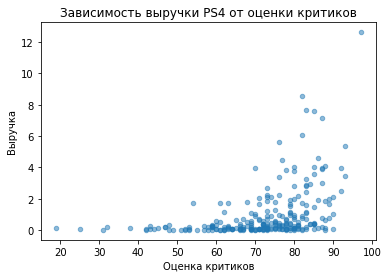

In [32]:
st_ps.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки PS4 от оценки критиков')
ax = plt.gca()
ax.set_ylabel('Выручка')
ax.set_xlabel('Оценка критиков')

In [33]:
#корреляция продаж к отзывам критиков
st_ps['total_sales'].corr(st_ps['critic_score'])

0.40589480145836687

<b>Вывод:</b>
По графикам и значениям корреляции видно, что отзывы критиков в большей степени влияют на продажи, чем отзывы пользователей.
Прослеживается закоромерность значительного роста выручки при оценке  критиков более 70

### Анализ выводов и продаж игр на других платформах

In [34]:
#выделим в отдельную таблицу продажи без учета значений "-1" и PS4
st_o = df_n.query('platform != "PS4" and user_score != -1 and critic_score != -1')

Text(0.5, 0, 'Оценка пользователей')

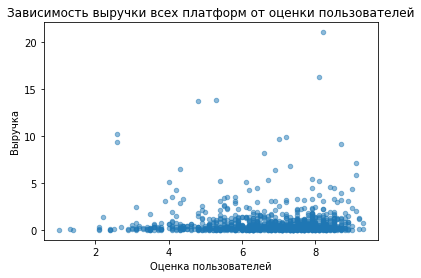

In [35]:
st_o.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки всех платформ от оценки пользователей')
ax = plt.gca()
ax.set_ylabel('Выручка')
ax.set_xlabel('Оценка пользователей')

In [36]:
#корреляция продаж к отзывам пользователей
st_o['total_sales'].corr(st_o['user_score'])

0.009742454472434624

Text(0.5, 0, 'Оценка критиков')

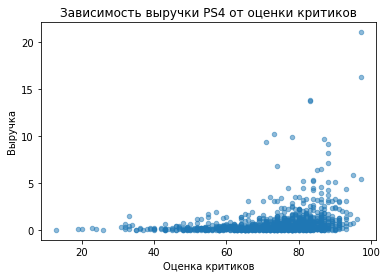

In [37]:
st_o.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки PS4 от оценки критиков')
ax = plt.gca()
ax.set_ylabel('Выручка')
ax.set_xlabel('Оценка критиков')

In [38]:
#корреляция продаж к отзывам критиков
st_o['total_sales'].corr(st_o['critic_score'])

0.28281979211123304

<b>Вывод:</b>
По полученным графикам и значениям корреляции остальных платформ выявлена небольшая разница между отзывами пользователей и критиков и несущественное влияние продаж от отзывов.

### Анализ жанров

In [39]:
df_n.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


<b>Вывод:</b>
- со значительным отрывом лидируют жанры Action, Shooter и Role-Playing.
- самые низкие сборы у жанров Puzzle, Strategy и Adventure.

## Составление портрета пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

 - самые популярные платформы (топ-5)
 - самые популярные жанры (топ-5)
 - влияние рейтинга ESRB на продажи в регионе

### Регион Северная Америка(NA)

In [40]:
df_n.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head()

,platform,na_sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31


In [41]:
df_n.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head()

,genre,na_sales
0,Action,177.84
8,Shooter,144.77
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19


In [42]:
df_n.query('rating != -1').groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head()

,rating,na_sales
2,M,231.57
0,E,114.37
1,E10+,75.70
3,T,66.02


<b>Выводы:
- в Северной Америке наибольшую популярность имеют платформы X360, PS4 и PS3
- наиболее популярными жанрами являются Action, Shooter, Sports, Role-Playing и Misc
- с большим отрывом по лидирует рейтинг M, затем идут E и E10+

### Регион Европа(EU)

In [43]:
df_n.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head()

,platform,eu_sales
4,PS4,141.09
3,PS3,106.86
9,X360,74.52
10,XOne,51.59
0,3DS,42.64


In [44]:
df_n.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head()

,genre,eu_sales
0,Action,159.34
8,Shooter,113.47
10,Sports,69.09
7,Role-Playing,48.53
6,Racing,27.29


In [45]:
df_n.query('rating != -1').groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head()

,rating,eu_sales
2,M,193.96
0,E,113.03
1,E10+,55.37
3,T,52.96


<b>Выводы:
- в Европе наибольшую популярность имеют платформы PS4, PS3, а также X360 и XOne
- наиболее популярными жанрами являются Action, Shooter, Sports, Role-Playing и Racing
- с большим отрывом по лидирует рейтинг M, затем E, завершают список E10+ и Т

### Регион Япония(JP)

In [46]:
df_n.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head()

,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01


In [47]:
df_n.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head()

,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,12.86
9,Simulation,10.41
2,Fighting,9.44


In [48]:
df_n.query('rating != -1').groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head()

,rating,jp_sales
0,E,28.33
3,T,26.02
2,M,21.20
1,E10+,8.19


<b>Выводы:
- в Японии наибольшую популярность имеют платформы 3DS, PS3 и PSV	
- наиболее популярными жанрами являются Role-Playing, Action, Misc, Sports, Simulation и Fighting
- лидируют рейтинг E, T и M

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<b><u>Сформулируем нулевую и альтернативную гипотезы</u>
    
 - Нулевая гипотеза (Hо): средние пользовательские рейтинги платформ Xbox One и PC равны
 - Альтернативная гипотеза(Н1): средние пользовательские рейтинги платформ Xbox One и PC не равны

In [49]:
xone = df.query('platform == "XOne"')
pc = df.query('platform == "PC"')
results = st.ttest_ind(
    xone['user_score'],
    pc['user_score'],
)

#уровень статистической значимости
alpha = .05

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Cредний пользовательский рейтинг платформы Xbox One -', xone['user_score'].mean().round(1))
print('Cредний пользовательский рейтинг платформы PC -', pc['user_score'].mean().round(1))

p-значение: 0.0010259813499343441
Отвергаем нулевую гипотезу

Cредний пользовательский рейтинг платформы Xbox One - 4.5
Cредний пользовательский рейтинг платформы PC - 5.4


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

<b><u>Сформулируем нулевую и альтернативную гипотезы</u>

 - Нулевая гипотеза (Hо): средние пользовательские рейтинги жанров Action и Sports равны
 - Альтернативная гипотеза(Н1): средние пользовательские рейтинги жанров Action и Sports не равны

In [50]:
act = df.query('genre == "Action"')
spr = df.query('genre == "Sports"')

results = st.ttest_ind(
    act['user_score'],
    spr['user_score'],
    equal_var = False
)
#уровень статистической значимости находится в памяти из предыдущего исследования
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Cредний пользовательский рейтинг жанра Action -', act['user_score'].mean().round(1))
print('Cредний пользовательский рейтинг жанра Sports -', spr['user_score'].mean().round(1))

p-значение: 1.1705362926146342e-08
Отвергаем нулевую гипотезу

Cредний пользовательский рейтинг жанра Action - 3.4
Cредний пользовательский рейтинг жанра Sports - 2.7


<b><u>Вывод: <br></u>
Обе выдвинутые гипотезы отвергануты:
 - средние пользовательские рейтинги платформ Xbox One и PC равны
 - средние пользовательские рейтинги жанров Action и Sports равны<br>
    
<i>По данным исследования гипотез видно, что различия между платформами и жанрами есть

## Общий вывод

### В ходе предобработки:

1) ознакомились с предоставленными данными, выявили ошибки и пропуски в датасете и обработали их: 
  - привели названия столбцов к нижнему регистру,
  - преобразовали данные в нужные типы,
  - обработали пропуски,
  - посчитали суммарные продажи во всех регионах и добавили в датасет.

2) провели исследовательский анализ данных, выделили срез данных за 2012-2016 гг

3) определили 10 платформ-лидеров по продажам: PS2, X360, PS3, Wii, DS, PS, GBA, PS4, PSP, PC

### В ходе анализа было выявлено:

1) В исследывании пик прибыли у большинства платформ приходится на 2007-2011 годы. <br>
2) С 2012 года выручка упала примерно в 2 раза. <br>
3) На текущем этапе (за 2012-2016гг) наиболее перспективной является платформа PS4 (последний выпуск семейства PS).<br>
4) На примере PS4 рассмотрели корреляцию "оценка критика"/"выручка" и "оценка пользователя"/выручка" и пришли к выводу о том, что отзывы критиков в большей степени влияют на продажи, а отзывы пользователей практически не влияют.<br>
5) Сравнивая полученные результаты с данными других платформ, можем утверждать, что выводы сопоставимы.<br>
6) Анализируя жанры, увидели, что самыми прибыльными являются Action, Sports и Shooter. Напротив в аутсайдерах Strategy,Adventure и Puzzle<br>

### Составили игровой портрет предпочтений пользователей в Северной Америке, Европе и Японии:

<b><i>Из проанализированных данных можем сделать вывод о том, что в Северной Америке и Европе пользовательские предпочтения схожи:</b></i>
 - лидируют платформы PS (PS4 и PS3: платформа PS в целом занимает в совокупности 1 место) и X360,
 - самые популярные жанры - Action, Shooter, Sports и Role-Playing,
 - с большим отрывом по продажам лидирует рейтинг M («Для взрослых») и E («Для всех»), в т.ч. E10+(«Для всех от 10 лет и старше»).

<b><i>У Японии свойственные ей предпочтения:</b></i>
 - лидируют семейства платформ 3DS, PS3 и PSV
 - самые популярные жанры - Role-Playing, Action, Misc, Sports, Simulation и Fighting. 
 - самые большие продажи у рейтингов E, T(«Подросткам») и M, что с некоторыми в целом схоже с мировыми тенденциями.

<i> Япония имеет свои сособенности и предпочтения, что дает основания подходить к рекламным компаниям на этом рынке обособленно.</i>

### Проверка выдвинутых гипотез

В результате проверки выдвинутых гипотез получили их опровержение, т.к. разница между пользовательскими рейтингами платформ и жанров существенна

### Рекомендации

<b><i>Планируя рекламную кампанию на 2017 год стоит обратить особое внимание на продвижение платформы PS4 (как наиболле восстребованой на рынке из-за её новизны и большого опыта продвижения (на основании прочих платформ серии PS)), а также платформ 3DS, PS3 и PSV для азиатского рынка. Также следует особое внимание  уделить жанрам Action, Shooter, Sports и Role-Playing, в Японии Role-Playing, Action, Misc, Sports, Simulation и Fighting.

Стоит уделять особое внимание Японскому рынку, нуждающемуся в особом подходе.